# Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

# Seed

In [2]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

# Data

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('MNIST', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('MNIST', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

# Architecture

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(10)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.bn2 = nn.BatchNorm2d(20)
        self.fc1 = nn.Linear(320, 50)
        self.bn3 = nn.BatchNorm1d(50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = F.relu(self.bn1(x))
        x = F.max_pool2d(self.conv2_drop(self.conv2(x)), 2)
        x = F.relu(self.bn2(x))
        x = x.view(-1, 320)
        x = F.relu(self.bn3(self.fc1(x)))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        return F.log_softmax(x)

In [6]:
network = Net()

optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

# Training

In [7]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [8]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), 'SavedNN')
            torch.save(optimizer.state_dict(), 'SavedNN')

In [9]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

# Run

In [10]:
test()
for epoch in range(1, n_epochs+1):
    train(epoch)
    test()

<ipython-input-5-07bcadd7aa37>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/Users/owen/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3148, Accuracy: 1137/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.398904
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.273256
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.246839
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.114421
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.107560
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.894486
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.868422
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.860377
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.780147
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.609790
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.895836
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.614323
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.520074
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.567617
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.398483
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.393346
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.332331
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.252467
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.088183
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.228100
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.399407
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.263324
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.469536
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.232521
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.215254
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.308776
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.175527
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.334403
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.215701
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.448807
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.371213
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.304635
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.205673
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.546345
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.180386
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.385592
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.216952
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.469579
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.258225


In [20]:
from PIL import Image
from PIL import ImageEnhance
import PIL.ImageOps
import numpy as np

original_data = False

if original_data:
    im = Image.open('/Users/owen/Desktop/Digit.jpg')
    im = im.resize((28, 28))
    im = im.convert('L')
    im = PIL.ImageOps.invert(im)

    enhancer = ImageEnhance.Contrast(im)
    im = enhancer.enhance(5)
    
    im_data = np.array(im).transpose()
else: 
    examples = enumerate(test_loader)
    batch_idx, (example_data, example_targets) = next(examples)
    im_data = example_data[0][0].numpy().transpose()

im_tensor = torch.Tensor(im_data)
im_tensor = im_tensor.unsqueeze(0).unsqueeze(0)

output = network(im_tensor)
pred = int(output.data.max(1, keepdim=True)[1])

<ipython-input-5-07bcadd7aa37>:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Text(0.5, 1.0, 'Prediction: 8')

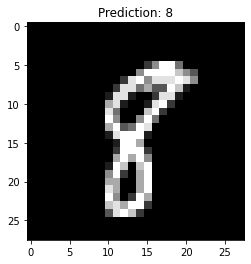

In [21]:
fig = plt.figure()
plt.imshow(im_data.transpose(), cmap='gray', interpolation='none')
plt.title(f'Prediction: {pred}')